In [27]:
from layout import getLayout
import util
from searchAgents import mazeDistance

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import networkx.convert_matrix

from functools import lru_cache
from itertools import combinations
import random

class FakeGameState:
    
    def __init__(self):
        self.lay = getLayout('mediumSearch.lay')
    
    def getWalls(self):
        return self.lay.walls
    
    def getFood(self):
        return self.lay.food
    
    def getPacmanPosition(self):
        return self.lay.agentPositions[0]

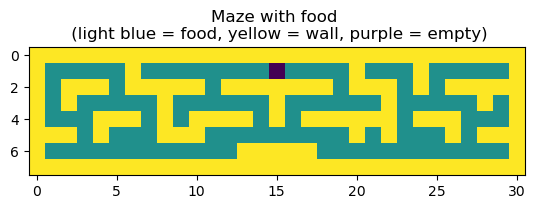

In [6]:
gameState = FakeGameState()
walls = np.array(gameState.getWalls().data)
food = np.array(gameState.getFood().data)
plt.imshow(np.transpose(walls + 0.5 * food))
plt.title('Maze with food \n (light blue = food, yellow = wall, purple = empty)')
plt.show()

In [18]:
@lru_cache(maxsize = None)
def foodAdjacencyMatrix(gameState):
    foodList = gameState.getFood().asList()
    foodIndices = {f : i+1 for i, f in enumerate(foodList)}
    numFood = len(foodList)
    adjM = np.zeros((numFood + 1, numFood + 1))
    for f1, f2 in combinations(foodList, 2):
        i, j = foodIndices[f1], foodIndices[f2]
        adjM[i, j] = adjM[j, i] = mazeDistance(gameState, f1, f2)
    return adjM

In [19]:
%%timeit
foodAdjacencyMatrix.cache_clear()
foodAdjacencyMatrix(gameState)

3.13 s ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


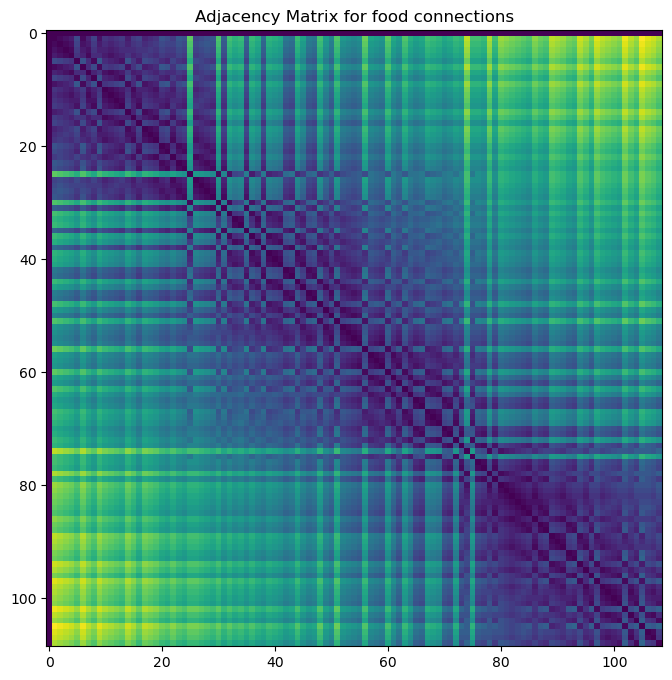

In [20]:
plt.figure(figsize = (8, 8))
plt.imshow(foodAdjacencyMatrix(gameState))
plt.title('Adjacency Matrix for food connections')
plt.show()

In [36]:
def minimumSpanningTreeTotalWeight(adjM):
    g = nx.convert_matrix.from_numpy_array(adjM)
    mst = nx.minimum_spanning_tree(g)
    return sum(e[2]['weight'] for e in mst.edges(data=True))

In [38]:
minimumSpanningTreeTotalWeight(foodAdjacencyMatrix(gameState))

107.0